# quantify degree of geostrophy with instantaneous fields, plots for skim


In [1]:
import os, sys, shutil
import numpy as np
import dask
import xarray as xr
from matplotlib import pyplot as plt
%matplotlib inline

import xgcm

from mitequinox.utils import *
from mitequinox.dynamic import *
from mitequinox.plot import *

In [2]:
from dask_jobqueue import PBSCluster
cluster = PBSCluster(cores=1)
w = cluster.scale(5) # postprocessing

In [3]:
# get dask handles and check dask server status
from dask.distributed import Client
client = Client(cluster)

In [5]:
client

Client Scheduler: tcp://10.135.39.92:40882 Dashboard: http://10.135.39.92:8787/status,Cluster Workers: 5 Cores: 5 Memory: 500.00 GB


---
## load global fields: instantaneous and subdiurnal


In [6]:
dsu = xr.concat([xr.open_zarr(work_data_dir+'mbal/%sgeo_f%02d_rms.zarr'%('u',face)) 
               for face in range(13)],dim='face').rename({'diff':'udiff'})
dsv = xr.concat([xr.open_zarr(work_data_dir+'mbal/%sgeo_f%02d_rms.zarr'%('v',face)) 
               for face in range(13)],dim='face').rename({'diff':'vdiff'})
ds = xr.merge([dsu,dsv])
ds = ds.assign_coords(f=2*omega_earth*np.sin(np.deg2rad(ds.YC))) # at center points
#
ds['uv_diff'] = np.sqrt(ds['udiff']**2 + ds['vdiff']**2)
ds['uv_coriolis_linear'] = np.sqrt(ds['ugeo_coriolis_linear']**2 + ds['vgeo_coriolis_linear']**2)
#
ds_i = ds.isel(i=slice(0,None,8),j=slice(0,None,8)).persist()
print(ds_i)

<xarray.Dataset>
Dimensions:               (face: 13, i: 540, j: 540)
Coordinates:
  * i                     (i) int64 0 8 16 24 32 40 ... 4280 4288 4296 4304 4312
  * j                     (j) int64 0 8 16 24 32 40 ... 4280 4288 4296 4304 4312
    CS                    (face, j, i) float32 dask.array<shape=(13, 540, 540), chunksize=(1, 540, 540)>
    Depth                 (face, j, i) float32 dask.array<shape=(13, 540, 540), chunksize=(1, 540, 540)>
    SN                    (face, j, i) float32 dask.array<shape=(13, 540, 540), chunksize=(1, 540, 540)>
    XC                    (face, j, i) float32 dask.array<shape=(13, 540, 540), chunksize=(1, 540, 540)>
    YC                    (face, j, i) float32 dask.array<shape=(13, 540, 540), chunksize=(1, 540, 540)>
  * face                  (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    f                     (face, j, i) float32 dask.array<shape=(13, 540, 540), chunksize=(1, 540, 540)>
Data variables:
    udiff                 (face, j, i) fl

In [7]:
dsu = xr.concat([xr.open_zarr(work_data_dir+'mbal/%sgeo_subd_f%02d_rms.zarr'%('u',face)) 
               for face in range(13)],dim='face').rename({'diff':'udiff'})
dsv = xr.concat([xr.open_zarr(work_data_dir+'mbal/%sgeo_subd_f%02d_rms.zarr'%('v',face)) 
               for face in range(13)],dim='face').rename({'diff':'vdiff'})
ds = xr.merge([dsu,dsv])
ds = ds.assign_coords(f=2*omega_earth*np.sin(np.deg2rad(ds.YC))) # at center points
#
ds['uv_diff'] = np.sqrt(ds['udiff']**2 + ds['vdiff']**2)
ds['uv_coriolis_linear'] = np.sqrt(ds['ugeo_coriolis_linear']**2 + ds['vgeo_coriolis_linear']**2)
#
ds_s = ds.isel(i=slice(0,None,8),j=slice(0,None,8)).persist()
print(ds_s)

<xarray.Dataset>
Dimensions:               (face: 13, i: 540, j: 540)
Coordinates:
  * i                     (i) int64 0 8 16 24 32 40 ... 4280 4288 4296 4304 4312
  * j                     (j) int64 0 8 16 24 32 40 ... 4280 4288 4296 4304 4312
    CS                    (face, j, i) float32 dask.array<shape=(13, 540, 540), chunksize=(1, 540, 540)>
    Depth                 (face, j, i) float32 dask.array<shape=(13, 540, 540), chunksize=(1, 540, 540)>
    SN                    (face, j, i) float32 dask.array<shape=(13, 540, 540), chunksize=(1, 540, 540)>
    XC                    (face, j, i) float32 dask.array<shape=(13, 540, 540), chunksize=(1, 540, 540)>
    YC                    (face, j, i) float32 dask.array<shape=(13, 540, 540), chunksize=(1, 540, 540)>
  * face                  (face) int64 0 1 2 3 4 5 6 7 8 9 10 11 12
    f                     (face, j, i) float32 dask.array<shape=(13, 540, 540), chunksize=(1, 540, 540)>
Data variables:
    udiff                 (face, j, i) fl

### flow rms

{'fig': <Figure size 1080x1080 with 2 Axes>,
 'ax': <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x2b59992d2cf8>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x2b59a04f8b70>}

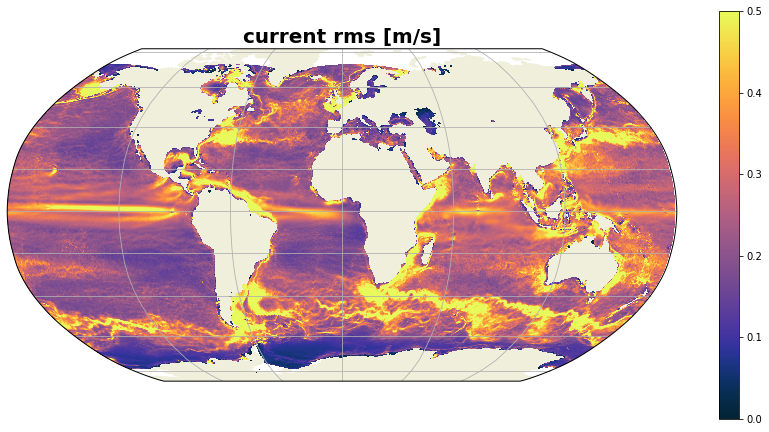

In [8]:
plot_pretty(ds_i.uv_coriolis_linear/np.abs(ds.f), title='current rms [m/s]',
            vmin=0., vmax=.5, cmap=cm.thermal, ignore_face=[6],
            colorbar=True, colorbar_kwargs={'shrink':.5})

{'fig': <Figure size 1080x1080 with 2 Axes>,
 'ax': <cartopy.mpl.geoaxes.GeoAxesSubplot at 0x2b59aa210f98>,
 'cbar': <matplotlib.colorbar.Colorbar at 0x2b59b3a39f60>}

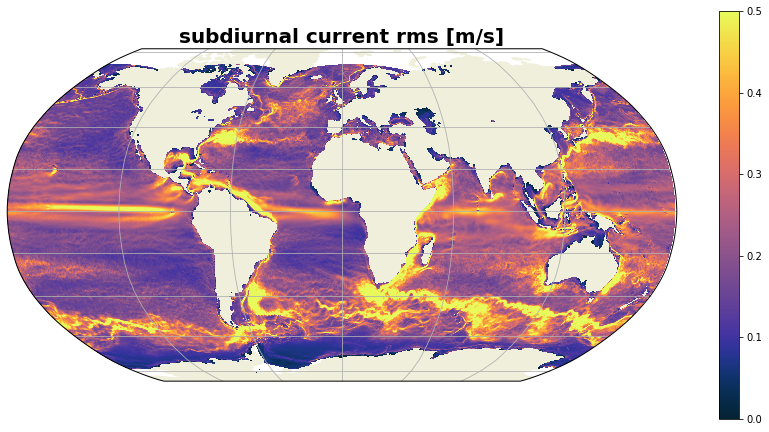

In [9]:
plot_pretty(ds_s.uv_coriolis_linear/np.abs(ds.f), title='subdiurnal current rms [m/s]',
            vmin=0., vmax=.5, cmap=cm.thermal, ignore_face=[6],
            colorbar=True, colorbar_kwargs={'shrink':.5})

### ageostrophic kinetic energy over total kinetic energy

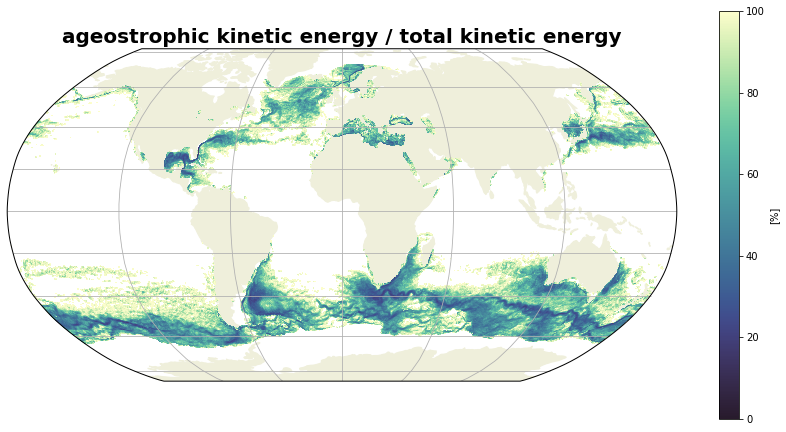

In [11]:
toplt = ds_i.uv_diff/ds_i.uv_coriolis_linear * 100
toplt = toplt.where(toplt<100.)
hdl = plot_pretty(toplt, title='ageostrophic kinetic energy / total kinetic energy',
            vmin=0., vmax=100., cmap=cm.deep_r, ignore_face=[6],
            colorbar=True, colorbar_kwargs={'shrink':.5, })
hdl['cbar'].set_label('[%]')

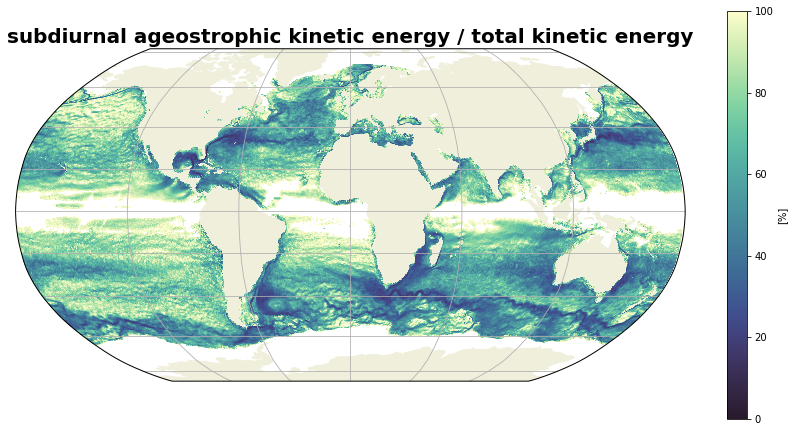

In [12]:
toplt = ds_s.uv_diff/ds_s.uv_coriolis_linear*100.
toplt = toplt.where(toplt<100.)
hdl = plot_pretty(toplt, title='subdiurnal ageostrophic kinetic energy / total kinetic energy',
            vmin=0., vmax=100., cmap=cm.deep_r, ignore_face=[6],
            colorbar=True, colorbar_kwargs={'shrink':.5})
hdl['cbar'].set_label('[%]')

---

In [13]:
cluster.close()